In [1]:
import tensorflow as tf

# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    print('GPU device not found')

Found GPU at: /device:GPU:0


In [2]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: NVIDIA GeForce GTX 1080 Ti


In [3]:
import pandas as pd

In [4]:
from numpy.random import RandomState
#%% Split whole dataset into train and valid set
df = pd.read_csv('mr/twitter.csv')
rng = RandomState()

train = df.sample(frac=0.9, random_state=rng)
test = df.loc[~df.index.isin(train.index)]
train.to_csv('train-twitter.csv', index=False)
test.to_csv('test-twitter.csv', index=False)

In [5]:
train_df = pd.read_csv("train-twitter.csv", encoding='unicode_escape', header=0)

In [6]:
train_df

,sentiment,review
0,0,I should know better than to tell Panda &quot;...
1,1,@bryantma I think i'm falling in love with you...
2,1,Good morning/afternoon/evening/night! Time to ...
3,1,@djknucklehead http://twitpic.com/6rfwh - you ...
4,0,I just remembered how much I wanted a pair of ...
...,...,...
18423,0,Wish I was going to glasto
18424,1,@moonfrye clear gummy bears = pineapple
18425,0,@Romeovoid21 No reason. Just the typical BLOCK...
18426,1,@saffyz and you trained in today's super power...


In [7]:
train_df.iloc[0][1]

C:\Users\huyen\AppData\Local\Temp\ipykernel_11436\1864895821.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  train_df.iloc[0][1]


"I should know better than to tell Panda &quot;When you wake up we're going to the park!&quot; Surefire way for it to be a very rainy morning. "

In [8]:
test_df = pd.read_csv("test-twitter.csv", encoding='unicode_escape', header=0)

In [9]:
test_df.shape

(2047, 2)

In [10]:
test_df.head()

,sentiment,review
0,1,Sugar levels dropping... munchies setting in. ...
1,0,Worried about my cat. Took him to the vet and ...
2,0,How did i get stuck watchin over everything Sm...
3,1,"@AprilAMiller Its 5:30 in the evening, sunset ..."
4,0,"at work, cold and ronery."


In [11]:
train_df['sentiment'] = (train_df['sentiment']==1).astype(int)
test_df['sentiment'] = (test_df['sentiment']==1).astype(int)

train_df.head(30)

,sentiment,review
0,0,I should know better than to tell Panda &quot;...
1,1,@bryantma I think i'm falling in love with you...
2,1,Good morning/afternoon/evening/night! Time to ...
3,1,@djknucklehead http://twitpic.com/6rfwh - you ...
4,0,I just remembered how much I wanted a pair of ...
5,0,@abbyharenberg sadly ...NO. You know what tha...
6,0,@vladski damn dude. Sorry to hear about your car
7,0,ohh....none of my actual friends are on here ...
8,1,is in a party mood
9,0,@drayvujacic I didn't get to see u


In [12]:
test_df.head()

,sentiment,review
0,1,Sugar levels dropping... munchies setting in. ...
1,0,Worried about my cat. Took him to the vet and ...
2,0,How did i get stuck watchin over everything Sm...
3,1,"@AprilAMiller Its 5:30 in the evening, sunset ..."
4,0,"at work, cold and ronery."


In [13]:
train_df_bert = pd.DataFrame({
    "id": range(len(train_df)),
    "label": train_df['sentiment'],
    "sentence": train_df['review'].replace(r'\n', ' ', regex=True)
})

train_df_bert.head()

,id,label,sentence
0,0,0,I should know better than to tell Panda &quot;...
1,1,1,@bryantma I think i'm falling in love with you...
2,2,1,Good morning/afternoon/evening/night! Time to ...
3,3,1,@djknucklehead http://twitpic.com/6rfwh - you ...
4,4,0,I just remembered how much I wanted a pair of ...


In [14]:
train_df_bert

,id,label,sentence
0,0,0,I should know better than to tell Panda &quot;...
1,1,1,@bryantma I think i'm falling in love with you...
2,2,1,Good morning/afternoon/evening/night! Time to ...
3,3,1,@djknucklehead http://twitpic.com/6rfwh - you ...
4,4,0,I just remembered how much I wanted a pair of ...
...,...,...,...
18423,18423,0,Wish I was going to glasto
18424,18424,1,@moonfrye clear gummy bears = pineapple
18425,18425,0,@Romeovoid21 No reason. Just the typical BLOCK...
18426,18426,1,@saffyz and you trained in today's super power...


In [15]:
train_df_bert = train_df_bert.iloc[0:10000]

In [16]:
train_df_bert

,id,label,sentence
0,0,0,I should know better than to tell Panda &quot;...
1,1,1,@bryantma I think i'm falling in love with you...
2,2,1,Good morning/afternoon/evening/night! Time to ...
3,3,1,@djknucklehead http://twitpic.com/6rfwh - you ...
4,4,0,I just remembered how much I wanted a pair of ...
...,...,...,...
9995,9995,0,I wish i didn't have to go home i miss my sis...
9996,9996,1,I find is funny that my bank has a transaction...
9997,9997,0,Does anyone have a protection for Apache again...
9998,9998,1,Also new blog post from my Saturday beach adve...


In [17]:
test_df_bert = pd.DataFrame({
    "id": range(len(test_df)),
    "label": test_df['sentiment'],
    "sentence": test_df['review'].replace(r'\n', ' ', regex=True)
})

test_df_bert.head()

,id,label,sentence
0,0,1,Sugar levels dropping... munchies setting in. ...
1,1,0,Worried about my cat. Took him to the vet and ...
2,2,0,How did i get stuck watchin over everything Sm...
3,3,1,"@AprilAMiller Its 5:30 in the evening, sunset ..."
4,4,0,"at work, cold and ronery."


In [18]:
test_df_bert = test_df_bert.iloc[0:3000]

In [19]:
test_df_bert

,id,label,sentence
0,0,1,Sugar levels dropping... munchies setting in. ...
1,1,0,Worried about my cat. Took him to the vet and ...
2,2,0,How did i get stuck watchin over everything Sm...
3,3,1,"@AprilAMiller Its 5:30 in the evening, sunset ..."
4,4,0,"at work, cold and ronery."
...,...,...,...
2042,2042,0,Grr. You have to Nap?! honestly. I want you to...
2043,2043,1,http://twitpic.com/6t5de - As close as i may e...
2044,2044,0,keri you'll have to call me tonight for are ni...
2045,2045,0,@TexanSexican people that are anemic.


In [20]:
# Get the lists of sentences and their labels.
train_sentences = train_df_bert.sentence.values
train_labels = train_df_bert.label.values

In [21]:
# Get the lists of sentences and their labels.
test_sentences = test_df_bert.sentence.values
test_labels = test_df_bert.label.values

In [22]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Loading BERT tokenizer...


In [23]:
# Print the original sentence.
print(' Original: ', train_sentences[1])

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(train_sentences[1]))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(train_sentences[1])))

 Original:  @bryantma I think i'm falling in love with you!!  xxx #iloveyou
Tokenized:  ['@', 'bryant', '##ma', 'i', 'think', 'i', "'", 'm', 'falling', 'in', 'love', 'with', 'you', '!', '!', 'xx', '##x', '#', 'il', '##ove', '##you']
Token IDs:  [1030, 12471, 2863, 1045, 2228, 1045, 1005, 1049, 4634, 1999, 2293, 2007, 2017, 999, 999, 22038, 2595, 1001, 6335, 21818, 29337]


In [24]:
import warnings
warnings.filterwarnings('ignore')

max_len_train = 0

# For every sentence...
for sent in train_sentences:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent[:512], add_special_tokens=True)

    # Update the maximum sentence length.
    max_len_train = max(max_len_train, len(input_ids))

print('Max sentence length: ', max_len_train)

Max sentence length:  84


In [25]:
max_len_test = 0

# For every sentence...
for sent in test_sentences:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent[:512], add_special_tokens=True)

    # Update the maximum sentence length.
    max_len_test = max(max_len_test, len(input_ids))

print('Max sentence length: ', max_len_test)

Max sentence length:  59


In [26]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in train_sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 50,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                        truncation=True
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(train_labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', train_sentences[0])
print('Token IDs:', input_ids[0])

Original:  I should know better than to tell Panda &quot;When you wake up we're going to the park!&quot; Surefire way for it to be a very rainy morning. 
Token IDs: tensor([  101,  1045,  2323,  2113,  2488,  2084,  2000,  2425, 25462,  1004,
        22035,  2102,  1025,  2043,  2017,  5256,  2039,  2057,  1005,  2128,
         2183,  2000,  1996,  2380,   999,  1004, 22035,  2102,  1025,  2469,
        10273,  2126,  2005,  2009,  2000,  2022,  1037,  2200, 16373,  2851,
         1012,   102,     0,     0,     0,     0,     0,     0,     0,     0])


In [27]:

train_df_bert.head()

,id,label,sentence
0,0,0,I should know better than to tell Panda &quot;...
1,1,1,@bryantma I think i'm falling in love with you...
2,2,1,Good morning/afternoon/evening/night! Time to ...
3,3,1,@djknucklehead http://twitpic.com/6rfwh - you ...
4,4,0,I just remembered how much I wanted a pair of ...


In [28]:
(x_train, y_train), (x_test, y_test) = (train_df_bert.sentence,train_df_bert.label),(test_df_bert.sentence,test_df_bert.label)

In [29]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(x_train)
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

In [30]:
from keras_preprocessing.sequence import pad_sequences
# 2 - Define the number of words to be used from a review (truncate and pad input sequences)
print('Pad sequences (samples x time)')

max_review_length = 60

x_train = pad_sequences(x_train, maxlen=max_review_length)
print('X_train shape:',x_train.shape)
x_test = pad_sequences(x_test, maxlen=max_review_length)
print('X_test shape:',x_test.shape)

Pad sequences (samples x time)
X_train shape: (10000, 60)
X_test shape: (2047, 60)


In [31]:
from keras import backend as K
from tensorflow import keras
import tensorflow as tf

class FuzzyLayer(keras.layers.Layer):

    def __init__(self, 
                 output_dim, 
                 initial_centers=None,
                 initial_sigmas=None, 
                 **kwargs):
        if 'input_shape' not in kwargs and 'input_dim' in kwargs:
            kwargs['input_shape'] = (kwargs.pop('input_dim'),)
        self.output_dim = output_dim
        self.initial_centers = initial_centers
        self.initial_sigmas = initial_sigmas
        super(FuzzyLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.input_dimensions = list(input_shape)[:-1:-1]

        c_init_values =[]
        
        if self.initial_centers is None:
            c_init_values= tf.random_uniform_initializer(-1, 1)(shape=(input_shape[-1], self.output_dim), dtype="float32")    
        else:
            c_init_values =tf.convert_to_tensor(self.initial_centers, dtype="float32")
        self.c = tf.Variable(initial_value= c_init_values, trainable=True)

        a_init_values = []
        if self.initial_sigmas is None:
            a_init_values = tf.ones_initializer()(shape=(input_shape[-1], self.output_dim), dtype="float32")    
        else:
            a_init_values = tf.convert_to_tensor(self.initial_sigmas, dtype="float32")
        self.a = tf.Variable(initial_value= a_init_values, trainable=True)
        super(FuzzyLayer, self).build(input_shape)  

    def call(self, x):
        
        aligned_x = K.repeat_elements(K.expand_dims(x, axis = -1), self.output_dim, -1)
        aligned_c = self.c
        aligned_a = self.a
        for dim in self.input_dimensions:
            aligned_c = K.repeat_elements(K.expand_dims(aligned_c, 0), dim, 0)
            aligned_a = K.repeat_elements(K.expand_dims(aligned_a, 0), dim, 0)

        xc = K.exp(-K.sum(K.square((aligned_x - aligned_c) / (2 * aligned_a)), axis=-2, keepdims=False))
        
        return xc
        
    def compute_output_shape(self, input_shape):
        return tuple(input_shape[:-1]) + (self.output_dim,)


In [32]:
import tensorflow as tf
from tensorflow import keras
from keras import backend as K

class DefuzzyLayer(keras.layers.Layer):

    def __init__(self, 
                 output_dim, 
                 initial_rules_outcomes=None,
                 **kwargs):
        if 'input_shape' not in kwargs and 'input_dim' in kwargs:
            kwargs['input_shape'] = (kwargs.pop('input_dim'),)
        self.output_dim = output_dim
        self.initial_rules_outcomes = initial_rules_outcomes
        super(DefuzzyLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.input_dimensions = list(input_shape)[:-1:-1]

        outcomes_init_values = []
        if self.initial_rules_outcomes is None:
            outcomes_init_values = tf.random_uniform_initializer()(shape=(input_shape[-1], self.output_dim), dtype="float32")    
        else:
            outcomes_init_values = tf.convert_to_tensor(self.initial_rules_outcomes, dtype="float32")
        
        self.rules_outcome = tf.Variable(initial_value = outcomes_init_values, trainable=True)
        
        super(DefuzzyLayer, self).build(input_shape)  

    def call(self, x):
        aligned_x = K.repeat_elements(K.expand_dims(x, axis = -1), self.output_dim, -1)
        aligned_rules_outcome = self.rules_outcome
        for dim in self.input_dimensions:
            aligned_rules_outcome = K.repeat_elements(K.expand_dims(aligned_rules_outcome, 0), dim, 0)
        
        xc = K.sum((aligned_x * aligned_rules_outcome), axis=-2, keepdims=False)
        return xc
        
    def compute_output_shape(self, input_shape):
        return tuple(input_shape[:-1]) + (self.output_dim,)
    
    def get_config(self):
        return {"rules_outcome": self.rules_outcome.numpy()}


In [33]:
#FuzzyCNNLSTM
import tensorflow
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation, Flatten
from keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from keras.layers import Conv1D
from keras.layers import GlobalMaxPooling1D,MaxPooling1D
from keras.layers import Embedding
import matplotlib.pyplot as plt
#regularise = tensorflow.keras.regularizers.l2(0.001)
#from FuzzyLayer import FuzzyLayer
#from DefuzzyLayer import DefuzzyLayer

# 3 - Neural network model design
print('Building model')
max_features = 2000
embedding_vector_length = 32

filters = 32
kernel_size = 3
hidden_dims = 40
nb_classes = 2
#input_shape=x_train.shape
model = Sequential()
model.add(Embedding(max_features, embedding_vector_length, input_length=max_review_length))

model.add(Bidirectional(LSTM(30,activation='tanh',
                             recurrent_activation='sigmoid',
                             return_state=False,
                             return_sequences=False)))
#model.add(Dense(8,activation='relu',kernel_regularizer=regularise))
model.add(Dropout(0.1))
model.add(FuzzyLayer(20, input_dim=2))
model.add(Dropout(0.1))
model.add(DefuzzyLayer(10))
model.add(Dropout(0.1))
#model.add(Dense(1))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


Building model
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 60, 32)            64000     
_________________________________________________________________
bidirectional (Bidirectional (None, 60)                15120     
_________________________________________________________________
dropout (Dropout)            (None, 60)                0         
_________________________________________________________________
fuzzy_layer (FuzzyLayer)     (None, 20)                2400      
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
defuzzy_layer (DefuzzyLayer) (None, 10)                200       
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)  

In [34]:
import numpy as np
es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# 4 - Train the neural network model
history = model.fit(x_train, y_train,
                    epochs=20,
                    verbose=True,
                    callbacks=[es_callback],
                    #validation_data=(x_test, y_test),
                    validation_split=0.1,
                    batch_size=10)

loss, accuracy = model.evaluate(x_train, y_train, verbose=True)
print("Training Accuracy: {:.6f}".format(accuracy))
print("Training Loss: {:.6f}".format(loss))
loss, accuracy = model.evaluate(x_test, y_test, verbose=True)
print("Testing Accuracy:  {:.6f}".format(accuracy))
print("Testing Loss:  {:.6f}".format(loss))


Epoch 1/20
900/900 [==============================] - 17s 15ms/step - loss: 0.6336 - accuracy: 0.6138 - val_loss: 0.5305 - val_accuracy: 0.7280
Epoch 2/20
900/900 [==============================] - 12s 14ms/step - loss: 0.4929 - accuracy: 0.7708 - val_loss: 0.5123 - val_accuracy: 0.7430
Epoch 3/20
900/900 [==============================] - 13s 14ms/step - loss: 0.4326 - accuracy: 0.8036 - val_loss: 0.5462 - val_accuracy: 0.7280
Epoch 4/20
900/900 [==============================] - 12s 14ms/step - loss: 0.3975 - accuracy: 0.8207 - val_loss: 0.5386 - val_accuracy: 0.7350
Epoch 5/20
313/313 [==============================] - 3s 7ms/step - loss: 0.3187 - accuracy: 0.8646
Training Accuracy: 0.864600
Training Loss: 0.318734
64/64 [==============================] - 0s 7ms/step - loss: 0.6143 - accuracy: 0.7328
Testing Accuracy:  0.732780
Testing Loss:  0.614319


In [35]:
#FuzzyCNNLSTM
import tensorflow
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation, Flatten
from keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from keras.layers import Conv1D
from keras.layers import GlobalMaxPooling1D,MaxPooling1D
from keras.layers import Embedding
import matplotlib.pyplot as plt
#regularise = tensorflow.keras.regularizers.l2(0.001)
#from FuzzyLayer import FuzzyLayer
#from DefuzzyLayer import DefuzzyLayer

# 3 - Neural network model design
print('Building model')
max_features = 2000
embedding_vector_length = 32

filters = 32
kernel_size = 3
hidden_dims = 40
nb_classes = 2
#input_shape=x_train.shape
model = Sequential()
model.add(Embedding(max_features, embedding_vector_length, input_length=max_review_length))

model.add(Conv1D(filters=32, kernel_size=5, padding='same', activation='relu',))
model.add(Dropout(0.1))
model.add(Conv1D(filters=32, kernel_size=4, padding='same', activation='relu'))
model.add(Dropout(0.1))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.1))
model.add(FuzzyLayer(20, input_dim=2))
model.add(Dropout(0.1))
model.add(DefuzzyLayer(10))
model.add(Dropout(0.1))
#model.add(Dense(1))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


Building model
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 60, 32)            64000     
_________________________________________________________________
conv1d (Conv1D)              (None, 60, 32)            5152      
_________________________________________________________________
dropout_3 (Dropout)          (None, 60, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 60, 32)            4128      
_________________________________________________________________
dropout_4 (Dropout)          (None, 60, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 60, 32)            3104      
_________________________________________________________________
dropout_5 (Dropout)          (None, 60,

In [ ]:
import numpy as np
es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# 4 - Train the neural network model
history = model.fit(x_train, y_train,
                    epochs=20,
                    verbose=True,
                    callbacks=[es_callback],
                    #validation_data=(x_test, y_test),
                    validation_split=0.1,
                    batch_size=10)

loss, accuracy = model.evaluate(x_train, y_train, verbose=True)
print("Training Accuracy: {:.6f}".format(accuracy))
print("Training Loss: {:.6f}".format(loss))
loss, accuracy = model.evaluate(x_test, y_test, verbose=True)
print("Testing Accuracy:  {:.6f}".format(accuracy))
print("Testing Loss:  {:.6f}".format(loss))


Epoch 1/20
900/900 [==============================] - 7s 6ms/step - loss: 0.6899 - accuracy: 0.5133 - val_loss: 0.6856 - val_accuracy: 0.5512
Epoch 2/20
 27/900 [..............................] - ETA: 5s - loss: 0.6845 - accuracy: 0.5360

In [65]:
import numpy as np
y_pred = model.predict(x_test)
y_predicted_labels = np.array([ np.argmax(i) for i in y_pred])
y_test_labels = np.array([ np.argmax(i) for i in y_test])
from sklearn.metrics import confusion_matrix

In [66]:
cm = confusion_matrix(y_test_labels, y_predicted_labels)

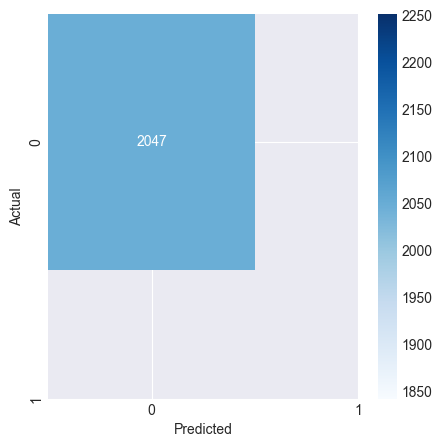

In [67]:
import seaborn as sn
labels=['0', '1']
plt.figure(figsize=(5,5))
sn.heatmap(cm,  xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()